In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Importing and Reading Data

In [3]:
#Load the dataset:
df = pd.read_csv('default credit card.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# Basic checks
### Exploratory Data Analysis

In [5]:
# Dataset Shape:

print(f"Total number of rows: {df.shape[0]} ")
print(f"Total number of columns : {df.shape[1]} ")
df.head()

Total number of rows: 30000 
Total number of columns : 25 


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
#to find -ve values
negative_ages = df[df['AGE'] < 0]
negative_ages

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month



###  Basic Structure Info


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

###  Statistical Summary

In [10]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Data Types of Columns

In [12]:
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

### handling missing values

In [14]:

missing = df.isnull().sum()
print("Missing values:\n", missing)

# Option: fill numeric NaNs with column median
df.fillna(df.median(numeric_only=True), inplace=True)

Missing values:
 ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


### unique Values in Each Column

In [16]:
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [17]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [18]:
#renaming the columns
df = df.rename(columns={'default payment next month': 'default_payment_next_month'})
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# To check duplicates

In [20]:

duplicates=df.duplicated().sum()
print(df.duplicated().unique())
print(f"Duplicate Rows : {duplicates}")


[False]
Duplicate Rows : 0


In [21]:
df.drop_duplicates()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [22]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# droping column ID


In [24]:
df.drop('ID', axis=1, inplace=True)

In [25]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [26]:
df_cleaned=df
df_cleaned

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# Filtering the numerical columns


In [28]:

target_col = 'default_payment_next_month'
numerical_cols = df_cleaned.select_dtypes(include=['number']).columns

# No.of rows for subplot
plots_per_row = 3
num_rows = (len(numerical_cols) + plots_per_row - 1) // plots_per_row



In [29]:
target_col

'default_payment_next_month'

In [30]:
numerical_cols

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

# Visualizating using boxplot to find outliers in numerical columns
 Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median


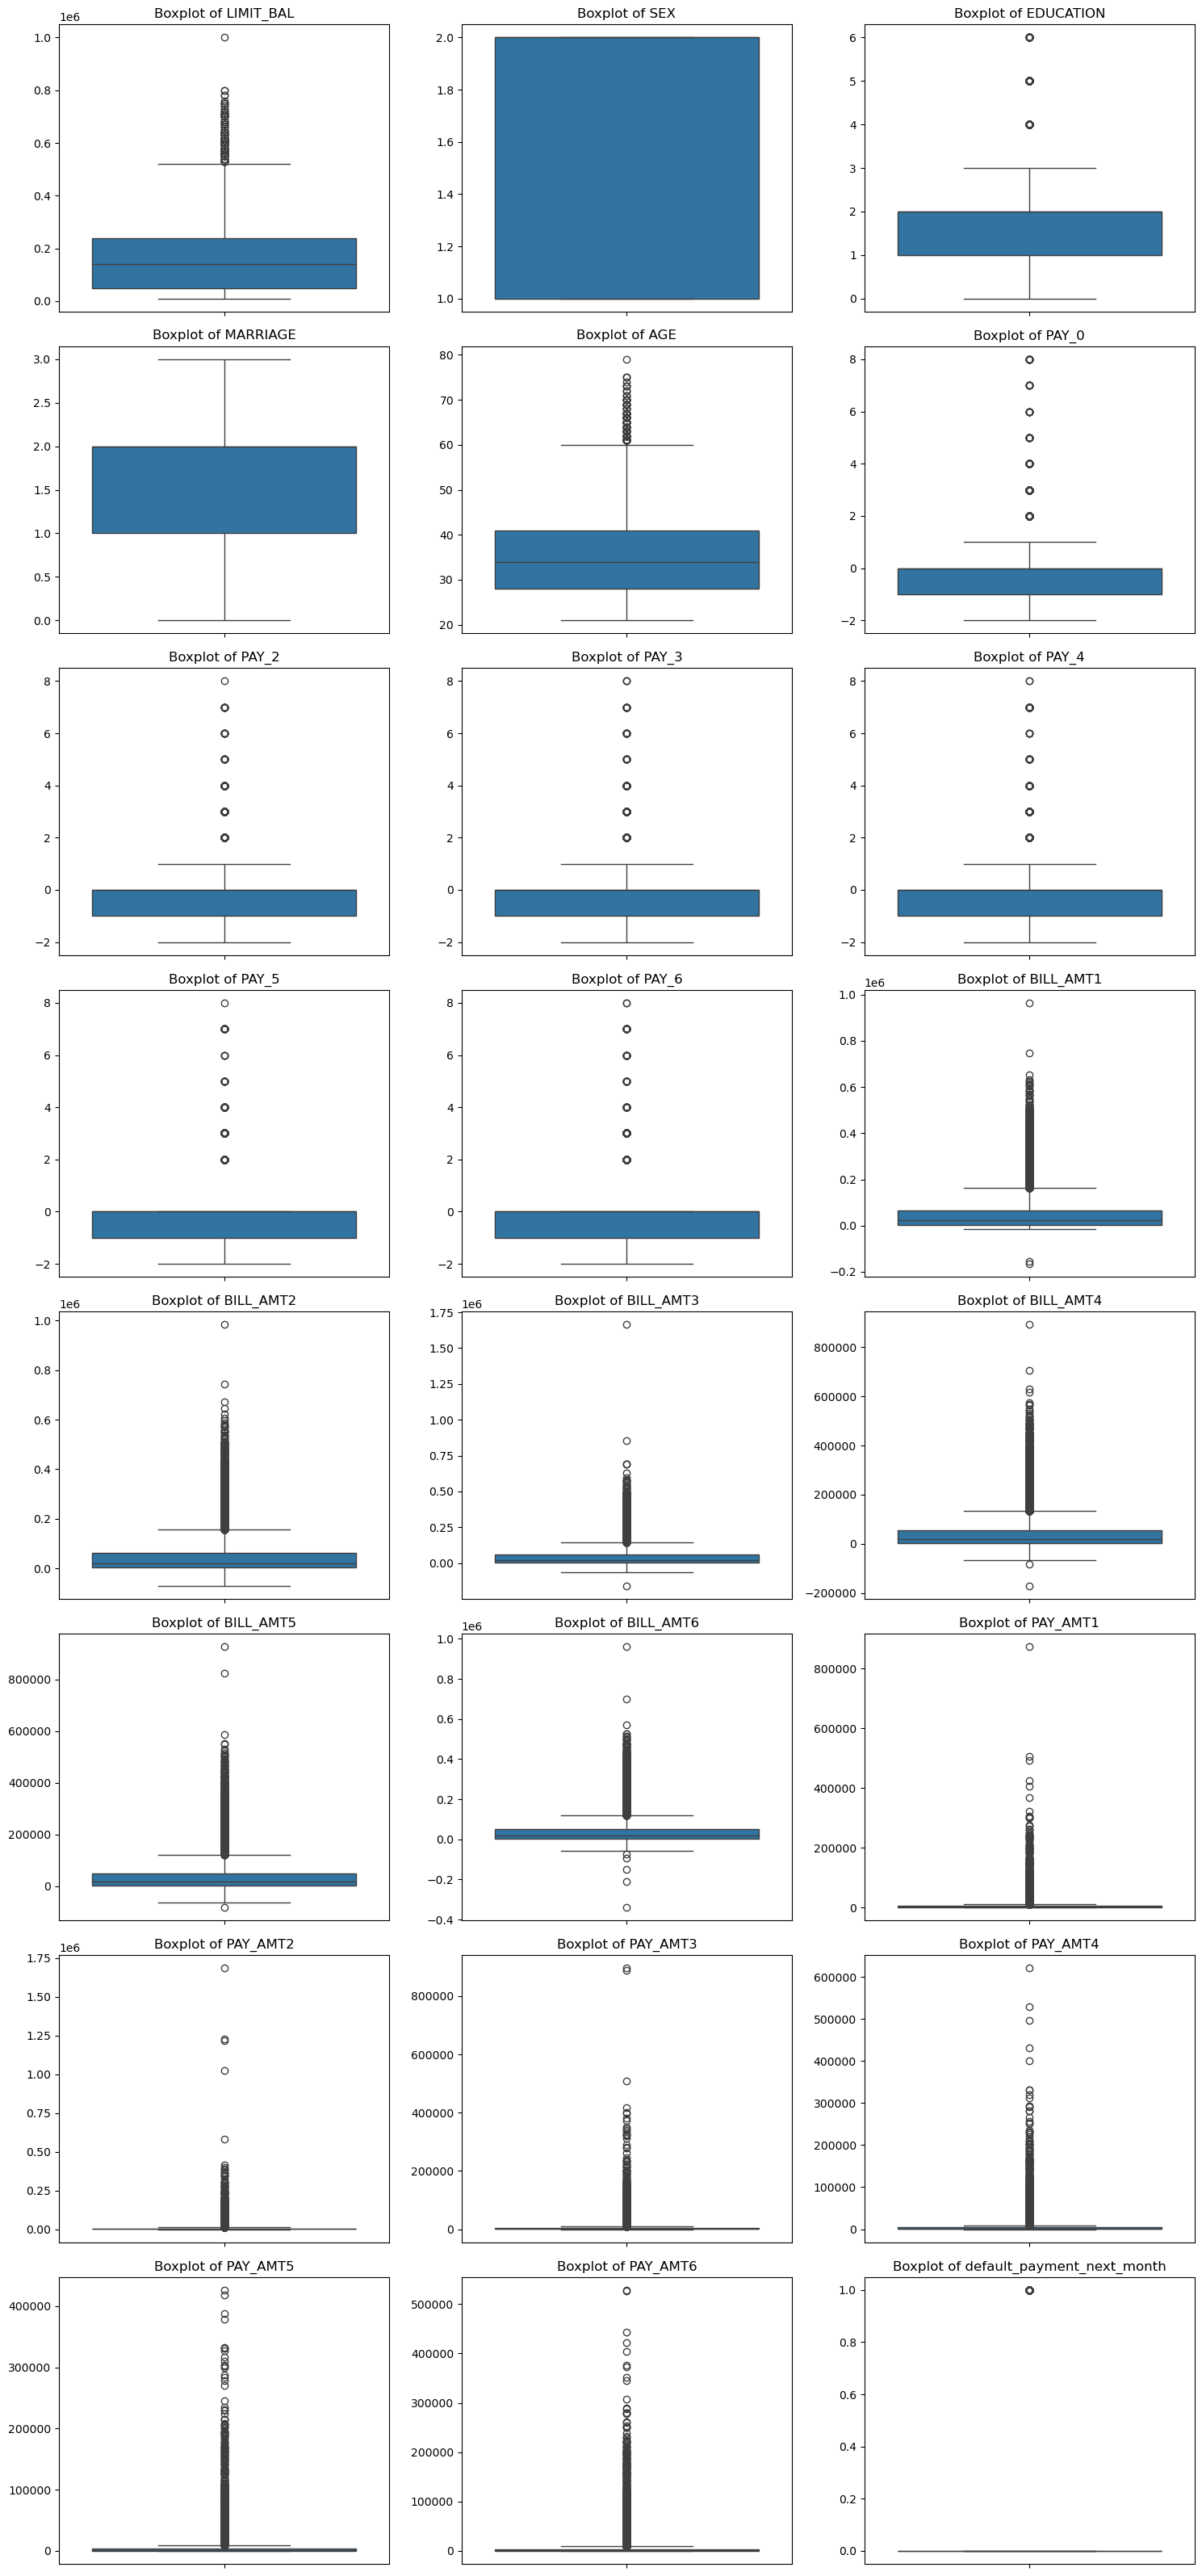

In [32]:
plt.figure(figsize=(15, num_rows * 4))
for i, col in enumerate(numerical_cols):
 
    plt.subplot(num_rows, plots_per_row, i + 1)
    sns.boxplot(data=df_cleaned, y=col)
    plt.title(f'Boxplot of {col}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [33]:


numerical_cols_clipping = [col for col in numerical_cols if col != 'default_payment_next_month']

for col in numerical_cols_clipping:
    q1 = df_cleaned[col].quantile(0.25)
    q3 = df_cleaned[col].quantile(0.75)
    IQR = q3 - q1
    lowerl = q1 - 1.5 * IQR
    upperl = q3 + 1.5 * IQR
# clipping
    df_cleaned[col] = df_cleaned[col].clip(lower=lowerl, upper=upperl)


In [34]:
 df_cleaned[col]

0           0.0
1        2000.0
2        5000.0
3        1000.0
4         679.0
          ...  
29995    1000.0
29996       0.0
29997    3100.0
29998    1804.0
29999    1000.0
Name: PAY_AMT6, Length: 30000, dtype: float64

# Without outliers

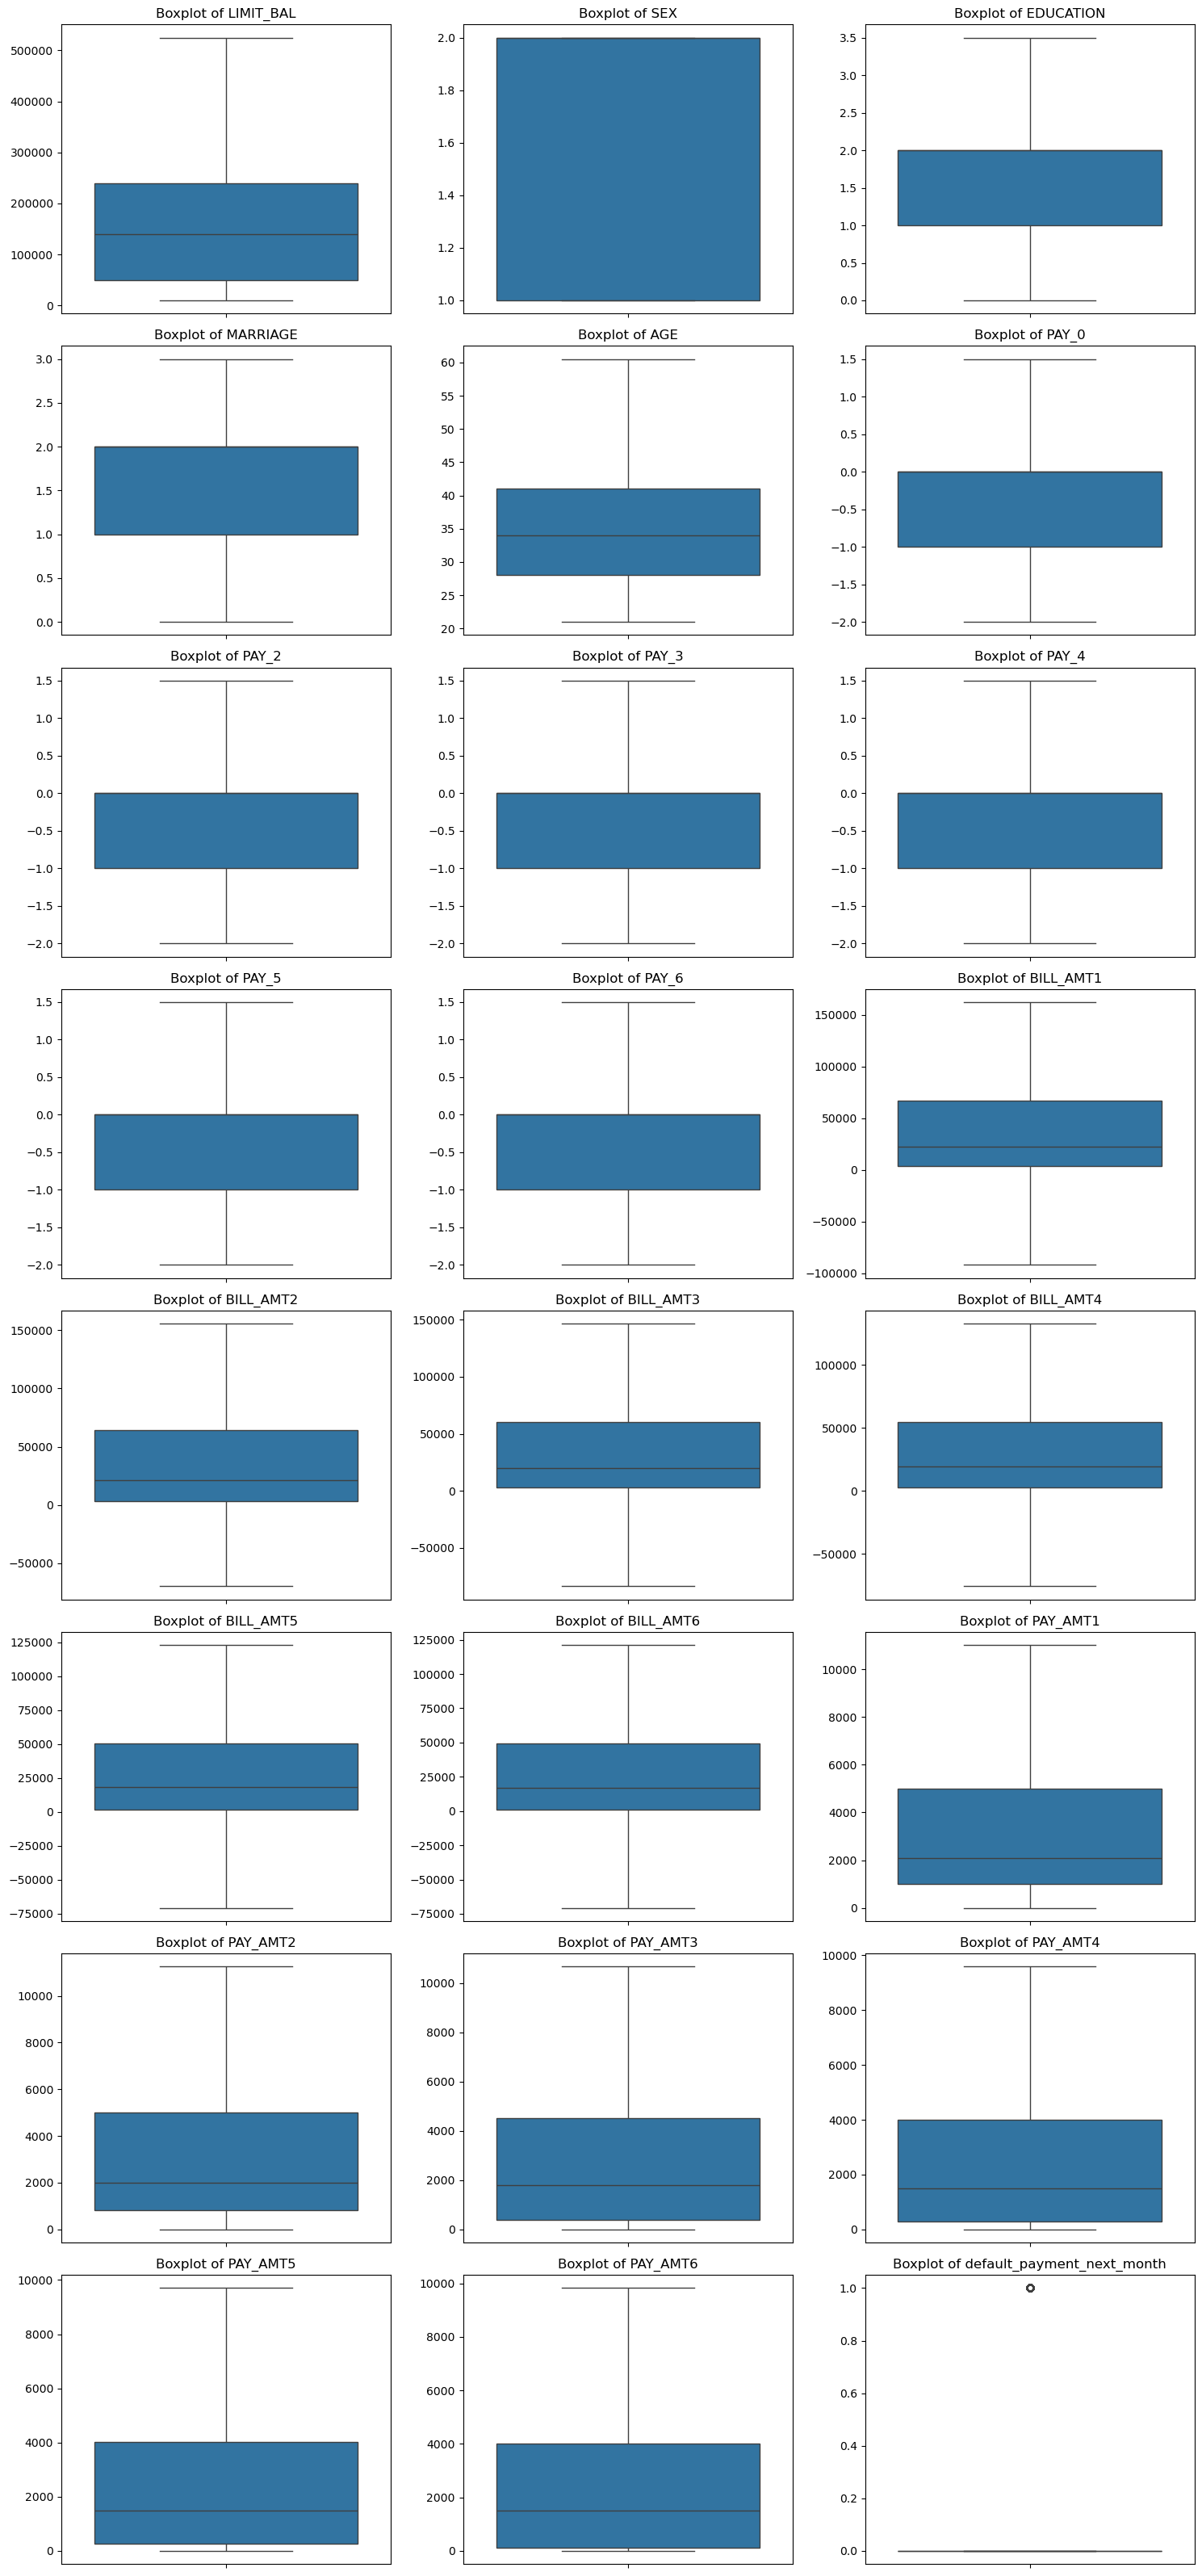

In [36]:
plt.figure(figsize=(15, num_rows * 4))
for i, col in enumerate(numerical_cols):
 
    plt.subplot(num_rows, plots_per_row, i + 1)
    sns.boxplot(data=df_cleaned, y=col)
    plt.title(f'Boxplot of {col}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

# MODEL EVALUATION 
 DATA SPLITTING 

In [38]:

x = df_cleaned.drop('default_payment_next_month', axis=1)
y = df_cleaned['default_payment_next_month']
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default_payment_next_month, Length: 30000, dtype: int64

In [39]:
print(y.value_counts())

default_payment_next_month
0    23364
1     6636
Name: count, dtype: int64


In [40]:
x.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2.0,1,24.0,1.5,1.5,-1.0,-1.0,-2.0,...,689.0,0.0,0.0,0.0,0,689.0,0.0,0.0,0,0.0
1,120000,2,2.0,2,26.0,-1.0,1.5,0.0,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0,1000.0,1000.0,1000.0,0,2000.0
2,90000,2,2.0,2,34.0,0.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518,1500.0,1000.0,1000.0,1000,5000.0
3,50000,2,2.0,1,37.0,0.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000,2019.0,1200.0,1100.0,1069,1000.0
4,50000,1,2.0,1,57.0,-1.0,0.0,-1.0,0.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000,11250.5,10000.0,9000.0,689,679.0


In [41]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default_payment_next_month, dtype: int64

## TRAIN TEST SPLIT

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size=0.2, random_state=41
)

print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([0, 1], dtype=int64), array([18698,  5302], dtype=int64))
(array([0, 1], dtype=int64), array([4666, 1334], dtype=int64))


In [44]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default_payment_next_month, dtype: int64

In [45]:
x.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2.0,1,24.0,1.5,1.5,-1.0,-1.0,-2.0,...,689.0,0.0,0.0,0.0,0,689.0,0.0,0.0,0,0.0
1,120000,2,2.0,2,26.0,-1.0,1.5,0.0,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0,1000.0,1000.0,1000.0,0,2000.0
2,90000,2,2.0,2,34.0,0.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518,1500.0,1000.0,1000.0,1000,5000.0
3,50000,2,2.0,1,37.0,0.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000,2019.0,1200.0,1100.0,1069,1000.0
4,50000,1,2.0,1,57.0,-1.0,0.0,-1.0,0.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000,11250.5,10000.0,9000.0,689,679.0


In [46]:
len(x_train),len(y_train),len(x_test),len(y_test)



(24000, 24000, 6000, 6000)

In [47]:
from sklearn.preprocessing import StandardScaler

## SCALING 


In [49]:
scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [50]:
x_train_scaled

array([[ 0.10181336,  0.80977982, -1.14958338, ..., -0.82038688,
         0.48057703, -0.86361995],
       [-1.14606935, -1.23490358,  0.23067582, ..., -0.88578432,
        -0.88183714,  2.29212197],
       [-0.91209134,  0.80977982,  0.23067582, ...,  0.25867084,
        -0.88183714, -0.54237171],
       ...,
       [-1.06807668,  0.80977982,  1.61093502, ...,  0.74915162,
        -0.55645067,  0.10526474],
       [ 1.19371073, -1.23490358, -1.14958338, ...,  2.24973669,
         0.5158677 ,  2.29212197],
       [ 0.49177671,  0.80977982,  0.23067582, ...,  0.82403168,
         0.20440324,  0.61347946]])

In [51]:
x_test_scaled

array([[-0.67811333,  0.80977982,  1.61093502, ..., -0.46429784,
        -0.57911441, -0.73833313],
       [-0.67811333, -1.23490358,  0.23067582, ..., -0.23180995,
        -0.23430189,  0.04744006],
       [ 1.2717034 ,  0.80977982,  0.23067582, ...,  0.41071988,
         1.92717077, -0.74026062],
       ...,
       [-0.60012067, -1.23490358,  1.61093502, ..., -0.20630494,
         0.05708897, -0.22112347],
       [-0.91209134, -1.23490358,  0.23067582, ..., -0.64054393,
        -0.51274204, -0.37211014],
       [ 1.50568141, -1.23490358, -1.14958338, ..., -0.88545733,
        -0.88151337, -0.8632987 ]])

In [52]:
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
print(x_train_scaled_df.head())

   LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0    PAY_2  \
0   0.101813  0.809780  -1.149583  0.847441  2.258689 -2.004502 -1.78330   
1  -1.146069 -1.234904   0.230676 -1.064620  1.051188 -2.004502 -1.78330   
2  -0.912091  0.809780   0.230676 -1.064620  0.063231  1.674930  1.74882   
3  -0.912091  0.809780   0.230676  0.847441 -1.473589  1.149297  1.74882   
4   0.101813  0.809780  -1.149583 -1.064620  1.270733  1.149297 -1.78330   

      PAY_3     PAY_4     PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0 -1.751609 -1.752458 -1.756362  ...  -0.822613  -0.861553  -0.847843   
1 -1.751609 -1.752458 -1.756362  ...  -0.861909  -0.856864  -0.847843   
2  1.764207  0.313967  0.358887  ...   0.168409   0.164819   0.037381   
3  0.257429  0.313967  0.358887  ...  -0.734634  -0.696922  -0.661075   
4 -0.747090 -0.719245 -0.698737  ...  -0.837115  -0.809974  -0.847843   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0  -0.723095 -1.001327 -0.448

# MODEL DEVELOPMENT

In [54]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [55]:
logistic_model=LogisticRegression()
logistic_model.fit(x_train_scaled,y_train)
lr_result = logistic_model.predict(x_test_scaled)

In [56]:
RandomForest_model=RandomForestClassifier()
RandomForest_model.fit(x_train_scaled,y_train)
rf_result=  RandomForest_model.predict(x_test_scaled)

In [57]:
DecisionTree_model=DecisionTreeClassifier()
DecisionTree_model.fit(x_train_scaled,y_train)
dt_result =DecisionTree_model.predict(x_test_scaled)

In [58]:
SVC_model=SVC()
SVC_model.fit(x_train_scaled,y_train)
svm_result = SVC_model.predict(x_test_scaled)

In [59]:
Knn_model=KNeighborsClassifier()
Knn_model.fit(x_train_scaled,y_train)
knn_result =Knn_model.predict(x_test_scaled)

In [60]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [61]:
def comparison_model(y_test,result,model_name):
    CR=classification_report(y_test,result)
    CM=confusion_matrix(y_test,result)
    f1 = f1_score(y_test, result)

    print(f"{model_name} performance:")
    print('Classification Report:\n', CR)
    print("\n")
    print('Confusion matrix',CM)
    print("\n")
    print('f1-score', f1)
    return {
        'Model': model_name,
        'Classification Report': CR,
        'Confusion Matrix': CM,
        'f1-score':f1
    }
results=[]

In [62]:
results.append(comparison_model(y_test,lr_result,'logistic regression'))


logistic regression performance:
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.88      4666
           1       0.66      0.23      0.34      1334

    accuracy                           0.80      6000
   macro avg       0.74      0.60      0.61      6000
weighted avg       0.78      0.80      0.76      6000



Confusion matrix [[4507  159]
 [1023  311]]


f1-score 0.34478935698447893


In [63]:
results.append(comparison_model(y_test,dt_result,'Decision Tree'))


Decision Tree performance:
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      4666
           1       0.40      0.43      0.41      1334

    accuracy                           0.73      6000
   macro avg       0.62      0.62      0.62      6000
weighted avg       0.74      0.73      0.73      6000



Confusion matrix [[3799  867]
 [ 762  572]]


f1-score 0.4125495852866931


In [64]:
results.append(comparison_model(y_test,rf_result,' Random Forest'))

 Random Forest performance:
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4666
           1       0.65      0.38      0.48      1334

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



Confusion matrix [[4397  269]
 [ 833  501]]


f1-score 0.4762357414448669


In [65]:
results.append(comparison_model(y_test,svm_result,' Support Vector Machine'))

 Support Vector Machine performance:
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4666
           1       0.67      0.36      0.47      1334

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



Confusion matrix [[4423  243]
 [ 848  486]]


f1-score 0.4711585070285991


In [66]:
results.append(comparison_model(y_test,knn_result,' kNN'))

 kNN performance:
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      4666
           1       0.54      0.32      0.41      1334

    accuracy                           0.79      6000
   macro avg       0.69      0.62      0.64      6000
weighted avg       0.76      0.79      0.77      6000



Confusion matrix [[4304  362]
 [ 901  433]]


f1-score 0.40676373884452793


In [67]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='f1-score', ascending=False).reset_index(drop=True)
print(results_df[['Model', 'f1-score']])

                     Model  f1-score
0            Random Forest  0.476236
1   Support Vector Machine  0.471159
2            Decision Tree  0.412550
3                      kNN  0.406764
4      logistic regression  0.344789


In [68]:
# Get the best and worst models by F1-score
best_row = results_df.loc[results_df['f1-score'].idxmax()]
worst_row = results_df.loc[results_df['f1-score'].idxmin()]

# Format and print
print(f"Best Model: {best_row['Model']} with F1-score = {best_row['f1-score']:.4f}")
print(f"Worst Model: {worst_row['Model']} with F1-score = {worst_row['f1-score']:.4f}")

Best Model:  Random Forest with F1-score = 0.4762
Worst Model: logistic regression with F1-score = 0.3448


In [71]:
# ==== Simple Model Training & Evaluation ====
# Uses specified models: LogisticRegression, DecisionTree, RandomForest, SVC, KNN

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay,roc_auc_score, roc_curve

## Random forest - Confusion Matrix visualization

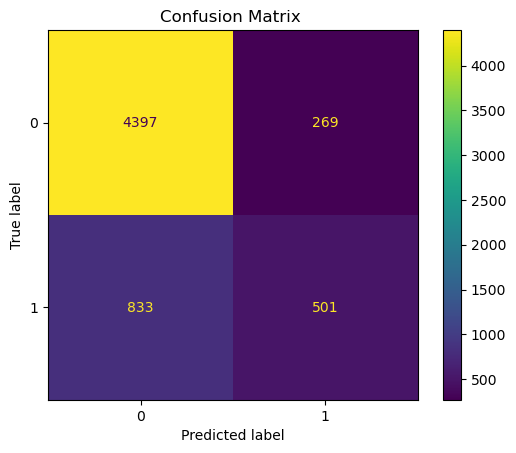

In [73]:
cm = confusion_matrix(y_test, rf_result)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix ")
plt.show()

In [79]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

target_col = "default_payment_next_month"

X = df.drop(columns=[target_col])
y = df[target_col].astype(int)

# Train/Test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Base Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier()
}
print("=== Base Models (default params) ===")
for name, mdl in models.items():
    mdl.fit(X_train_s, y_train)
    y_pred = mdl.predict(X_test_s)
    print(f"\n{name}")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
    print("confusion_matrix:", confusion_matrix(y_test, y_pred))
    print("classification_report:\n",classification_report(y_test, y_pred))
    



# ==== Address class imbalance ====
rf_bal = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
    n_estimators=grid.best_params_.get('n_estimators', 100),
    max_depth=grid.best_params_.get('max_depth', None)
)
# random forest with class_weight

rf_bal.fit(X_train_s, y_train)
y_pred_bal = rf_bal.predict(X_test_s)
print("\nRandom Forest (class_weight='balanced')")
print("Accuracy:", accuracy_score(y_test, y_pred_bal))
print(confusion_matrix(y_test, y_pred_bal))
print(classification_report(y_test, y_pred_bal))




=== Base Models (default params) ===

Logistic Regression
Accuracy: 0.8033
confusion_matrix: [[4510  163]
 [1017  310]]
classification_report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.88      4673
           1       0.66      0.23      0.34      1327

    accuracy                           0.80      6000
   macro avg       0.74      0.60      0.61      6000
weighted avg       0.78      0.80      0.76      6000


Decision Tree
Accuracy: 0.7152
confusion_matrix: [[3767  906]
 [ 803  524]]
classification_report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      4673
           1       0.37      0.39      0.38      1327

    accuracy                           0.72      6000
   macro avg       0.60      0.60      0.60      6000
weighted avg       0.72      0.72      0.72      6000


Random Forest
Accuracy: 0.8113
confusion_matrix: [[4383  290]
 [ 842  485]]
classification_report:
 

## Base Models (default params)
1. Best overall accuracy: SVC (81.5%) and Random Forest (81.1%)
2. Best minority class recall (class 1) among base models: Decision Tree (0.39) and SVC/RF (~0.36–0.37)


## Random Forest (class_weight="balanced")

1. Accuracy dropped slightly (0.81 → 0.79), but:

   Recall for class 1 jumped from 0.37 → 0.56 

   F1-score for class 1: 0.46 → 0.54 

2. Much better balance between the classes.


   This is a good improvement if your goal is catching defaulters.


# Hyperparameter Tuning with GridSearchCV
To improve model performance, we use **GridSearchCV** to find the best hyperparameters for our classifier. 
This ensures that the model is not just trained with default settings, but optimized for maximum performance.


In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define parameter grid (you can expand this if needed)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Random Forest with class_weight
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# GridSearchCV
grid_bal = GridSearchCV(
    rf,
    param_grid,
    cv=3,
    scoring='f1',   # focus on minority class (1) F1-score
    n_jobs=-1,
    verbose=2
)

grid_bal.fit(X_train_s, y_train)

# Best model
best_rf_bal = grid_bal.best_estimator_

# Predictions
y_pred_bal_tuned = best_rf_bal.predict(X_test_s)

print("Best Parameters (RF balanced):", grid_bal.best_params_)
print("\nTuned Random Forest (class_weight='balanced')")
print("Accuracy:", accuracy_score(y_test, y_pred_bal_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bal_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_bal_tuned))


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters (RF balanced): {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

Tuned Random Forest (class_weight='balanced')
Accuracy: 0.7875
Confusion Matrix:
 [[3974  699]
 [ 576  751]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      4673
           1       0.52      0.57      0.54      1327

    accuracy                           0.79      6000
   macro avg       0.70      0.71      0.70      6000
weighted avg       0.79      0.79      0.79      6000




##  Model Evaluation & Visualization
We compare the **default model** and the **tuned model** using visualizations:  
- Confusion Matrix (heatmap)  
- ROC Curve  
- Precision-Recall Curve  


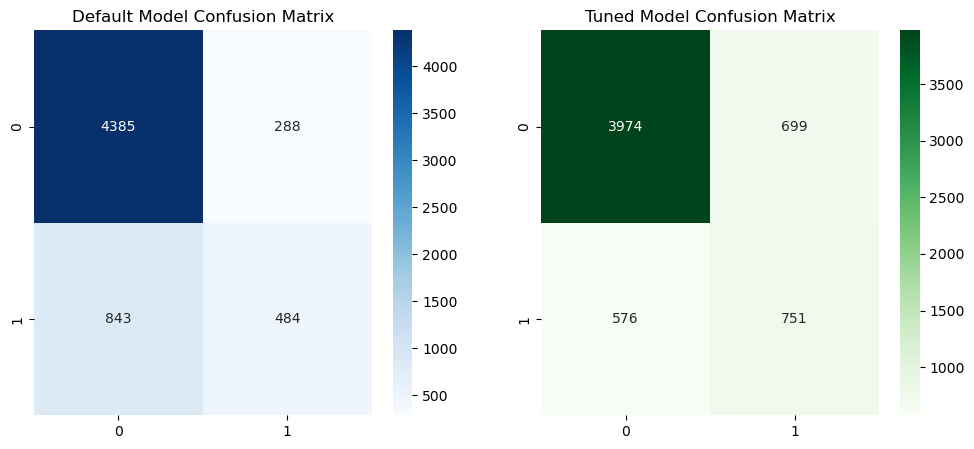

In [97]:

# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Default Model Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_default), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Default Model Confusion Matrix")

# Tuned Model Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_bal_tuned), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Tuned Model Confusion Matrix")

plt.show()




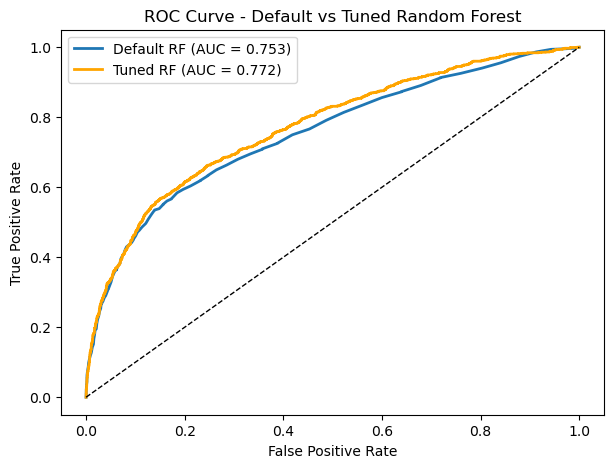

In [99]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# ==== Default Random Forest (before tuning) ====
rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train_s, y_train)
y_pred_prob_default = rf_default.predict_proba(X_test_s)[:, 1]

# ==== Tuned Random Forest (after tuning with class_weight) ====
rf_tuned = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2
)
rf_tuned.fit(X_train_s, y_train)
y_pred_prob_tuned = rf_tuned.predict_proba(X_test_s)[:, 1]

# ================== ROC Curve ==================
fpr_def, tpr_def, _ = roc_curve(y_test, y_pred_prob_default)
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_pred_prob_tuned)

auc_def = roc_auc_score(y_test, y_pred_prob_default)
auc_tuned = roc_auc_score(y_test, y_pred_prob_tuned)

plt.figure(figsize=(7, 5))
plt.plot(fpr_def, tpr_def, label=f"Default RF (AUC = {auc_def:.3f})", lw=2)
plt.plot(fpr_tuned, tpr_tuned, label=f"Tuned RF (AUC = {auc_tuned:.3f})", lw=2, color="orange")
plt.plot([0, 1], [0, 1], "k--", lw=1)  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Default vs Tuned Random Forest")
plt.legend()
plt.show()

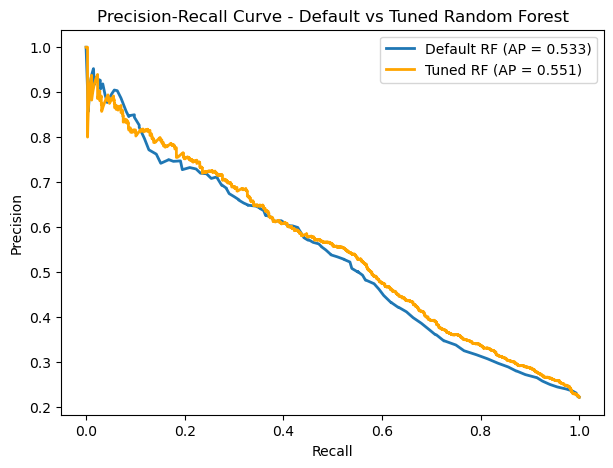

In [101]:
prec_def, rec_def, _ = precision_recall_curve(y_test, y_pred_prob_default)
prec_tuned, rec_tuned, _ = precision_recall_curve(y_test, y_pred_prob_tuned)

ap_def = average_precision_score(y_test, y_pred_prob_default)
ap_tuned = average_precision_score(y_test, y_pred_prob_tuned)

plt.figure(figsize=(7, 5))
plt.plot(rec_def, prec_def, label=f"Default RF (AP = {ap_def:.3f})", lw=2)
plt.plot(rec_tuned, prec_tuned, label=f"Tuned RF (AP = {ap_tuned:.3f})", lw=2, color="orange")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Default vs Tuned Random Forest")
plt.legend()
plt.show()

## ROC Curve Conclusion

Both default RF and tuned RF (with class_weight='balanced') show reasonably strong discrimination ability, with ROC-AUC around 0.76–0.78.

The tuned model’s ROC curve is slightly higher, showing it makes better trade-offs between TPR (recall) and FPR compared to the default.

This means the tuned model is more effective at ranking positive vs. negative cases.

## Precision-Recall Curve Conclusion

The default RF had lower average precision (AP ≈ 0.53), while the tuned RF improved to AP ≈ 0.55.

Since the dataset is imbalanced, the PR curve is a more reliable measure than ROC.

The tuned RF curve stays consistently above the default, meaning it achieves better recall at the same precision levels.

In practical terms → the tuned model finds more true positives without drastically increasing false positives.

## Final Takeaway:

The ROC curve shows the tuned model improves overall ranking ability.

The PR curve highlights that the tuned balanced model is better at handling the minority class, giving a clear improvement in recall and F1.